# 3.4 支援向量機(Support Vector Machine)介紹

[來源](https://medium.com/jameslearningnote/9c6c6925856b)

# 載入Iris資料集

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


# 將資料分為Train以及Test並將特徵標準化

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

# X_train, X_test, y_train, y_test 以上四個物件都是DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# X_train_std與X_test_std是numpy.ndarray

# 載入SVM中的SVC，並將kernel設為線性（SVM的Kernel可以換成非線性），並將Probability設為True

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', probability=True)

In [ ]:
svm.fit(X_train_std,y_train['target'].values) # 用fit進行模型訓練，y_train是Series，.values後轉成numpy.ndarray

SVC(kernel='linear', probability=True)

# 以test data來檢驗預測結果也都是100%全對

In [ ]:
svm.predict(X_test_std)

In [ ]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [ ]:
svm.predict_proba(X_test_std) # 每一個數據點，svm預測為0或是預測為1的信心百分比

array([[0.94929544, 0.05070456],
       [0.00849419, 0.99150581],
       [0.97330453, 0.02669547],
       [0.00734595, 0.99265405],
       [0.0186102 , 0.9813898 ],
       [0.12501442, 0.87498558],
       [0.98389034, 0.01610966],
       [0.00551612, 0.99448388],
       [0.00979835, 0.99020165],
       [0.01730715, 0.98269285],
       [0.02643748, 0.97356252],
       [0.032641  , 0.967359  ],
       [0.00911311, 0.99088689],
       [0.9799624 , 0.0200376 ],
       [0.96183605, 0.03816395],
       [0.94160281, 0.05839719],
       [0.98791008, 0.01208992],
       [0.87629918, 0.12370082],
       [0.98000703, 0.01999297],
       [0.95594749, 0.04405251],
       [0.94929544, 0.05070456],
       [0.03753437, 0.96246563],
       [0.94925842, 0.05074158],
       [0.04023817, 0.95976183],
       [0.96690569, 0.03309431],
       [0.96922094, 0.03077906],
       [0.96180793, 0.03819207],
       [0.02297186, 0.97702814],
       [0.0430971 , 0.9569029 ],
       [0.00685128, 0.99314872]])

In [ ]:
from matplotlib.colors import ListedColormap

"""以下yt原本是y，自行修改為了方便檢視"""
def plot_decision_regions(X, yt, classifier, test_idx=None, resolution=0.02): # X是(70,2)的array, y是(70,)的array, sklearn.linear_model._logistic.LogisticRegression

    # setup marker generator and color map
    markers = ('s', 'X', 'o', '^', 'v')                    # tuple 類型 (自行改成X，使用x有警告提示)
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')          # tuple 類型
    cmap = ListedColormap(colors[:len(np.unique(yt))])              # matplotlib.colors.ListedColormap 類型

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1        # 從X 的第一column中所有值取出最大的與最小的
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1        # 從X 的第二column中所有值取出最大的與最小的
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),      # 輸出: 類型 numpy.ndarray 大小 (236, 315), numpy.ndarray 大小 (236, 315)
                  np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)      # .ravel將2維變成1維; [[a,,...],[b,,...]]變成[[a,b],[,][,]]
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    """以上訂出背景圖樣(等高圖)"""

    for idx, cl in enumerate(np.unique(yt)):
      plt.scatter(x=X[yt == cl, 0],                       # y==cl回傳一維[...,True,..,False,..]的array，以True的位置當X的row回傳第1個column值
            y=X[yt == cl, 1],                       # y==cl回傳一維[...,True,..,False,..]的array，以True的位置當X的row回傳第2個column值
            alpha=0.6,
            # c=cmap(idx),                          # 有Warning~Python 3似乎使用ListedColormap有警告提示
            c=colors[idx],                          # 數據點的顏色

            edgecolor='black',                        # 數據點的外框色
            marker=markers[idx],                       # 數據點的外型
            label=cl)                             # 顯示數據類型的標標籤

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
              X_test[:, 1],
              c='',
              alpha=1.0,
              edgecolor='black',
              linewidths=1,
              marker='o',
              s=55, label='test set')

# 可以明顯看到SVM所切出來的線漂亮許多

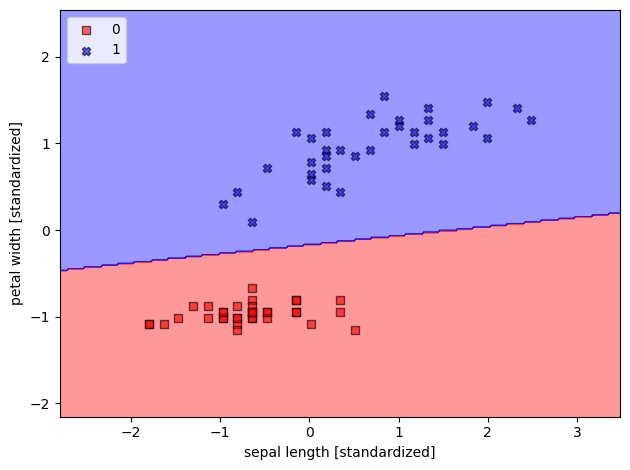

In [ ]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()